<a href="https://colab.research.google.com/github/khushidubeyokok/AI-ML/blob/main/02_Unsupervised_learning/02_HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical clustering
Hierarchical clustering is an unsupervised learning method that builds a tree-like structure (dendrogram) to group similar data points without needing to predefine the number of clusters.

- There are two main approaches:
    
    agglomerative (bottom-up), which starts with each point as its own cluster and merges the closest pairs, and divisive (top-down), which starts with all points in one cluster and splits them recursively.
- The similarity between clusters is measured using linkage methods like single, complete, average, or **Ward’s**, which influence how merging decisions are made.
- It's especially useful for small datasets where interpretability and flexibility are more important than speed.


This notebook demonstrates hierarchical clustering using both SciPy (for dendrogram visualization) and scikit-learn (for cluster label prediction).

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [12]:
# create blob of 200 datdaa points
datasets=make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.6,random_state=42)

In [13]:
datasets

(array([[ 7.62511805e+00,  2.73130236e+00],
        [-6.70078979e+00,  1.03293301e+01],
        [-8.85792259e+00,  5.88791592e+00],
        [-1.11552627e+01,  5.07158088e+00],
        [-7.82261080e+00, -5.52074624e+00],
        [-5.68395742e+00, -5.90351717e+00],
        [ 4.33210129e+00,  2.45564543e+00],
        [-9.59198905e+00,  7.69480282e+00],
        [ 4.21642790e+00,  6.32544035e+00],
        [-5.57904780e+00, -5.87270345e+00],
        [-8.36271595e+00, -6.97535016e+00],
        [ 5.00381473e+00,  4.06459809e+00],
        [ 6.37276083e+00,  3.65925297e+00],
        [-7.65620887e+00, -6.74911097e+00],
        [-1.01198553e+01, -6.58178269e+00],
        [-8.20601921e+00, -7.77639926e+00],
        [-2.62441382e+00,  1.06199388e+01],
        [-1.01538804e+01,  7.71342245e+00],
        [-5.78161089e+00, -9.46045499e+00],
        [-4.34200029e+00, -8.86061439e+00],
        [-3.48417728e+00, -5.22816518e+00],
        [-7.63953969e+00, -7.92543637e+00],
        [-8.32197806e+00,  5.999

In [14]:
points=datasets[0]
label=datasets[1]

To implement hierarchical clustering, use scipy.cluster.hierarchy.linkage to compute the linkage matrix and dendrogram to visualize it.

In [15]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

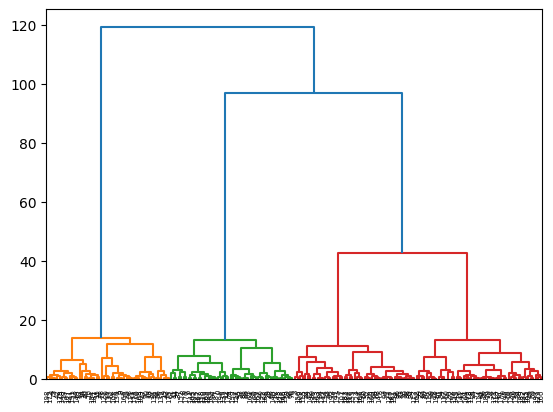

In [16]:
dendogram=sch.dendrogram(sch.linkage(points,method='ward'))

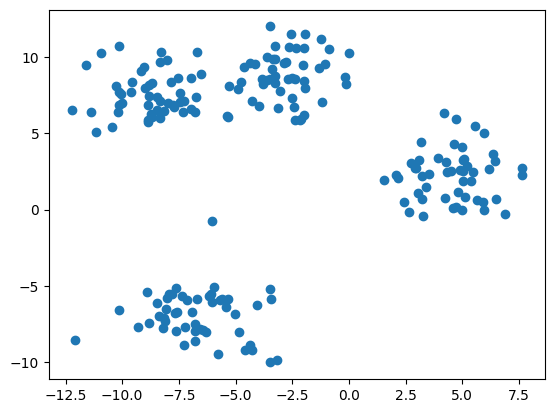

In [17]:
plt.scatter(datasets[0][:,0],datasets[0][:,1])

or use scikit-learn’s AgglomerativeClustering to predict cluster labels

In [18]:
# perform the actual clustering
hc=AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')

In [19]:
y_hc=hc.fit_predict(points)

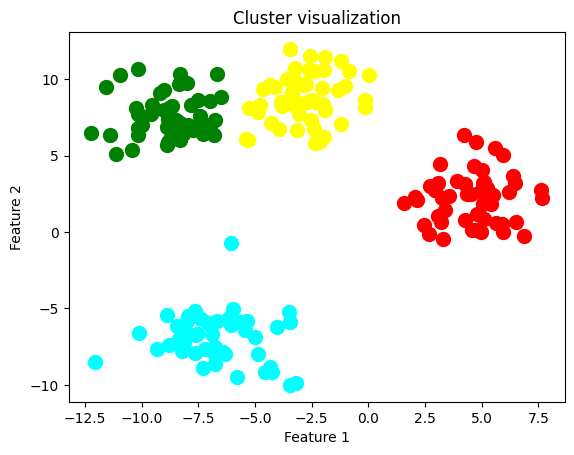

In [20]:
plt.title("Cluster visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(points[y_hc==0,0],points[y_hc==0,1],s=100,c='cyan')
plt.scatter(points[y_hc==1,0],points[y_hc==1,1],s=100,c='yellow')
plt.scatter(points[y_hc==2,0],points[y_hc==2,1],s=100,c='red')
plt.scatter(points[y_hc==3,0],points[y_hc==3,1],s=100,c='green')
plt.show()